In [1]:
# data frames and io
import pandas as pd
import glob
import os

# utils
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors


In [2]:
tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

colors = ['#601a4a','#9c9eb5']
sns.set_palette(sns.color_palette(colors))


%config InlineBackend.figure_format = 'retina'

In [179]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def data_plots(x,y,df,hue,axs):
    """ plots seaborn boxplots and stripplot """
    sns.stripplot(x = x,
                  y = y,
                  hue = hue, 
                  data = df,
                  dodge=True,
                  ax = axs)
    sns.boxplot(x = x,
                y = y,
                hue = hue,
                data = df,
                dodge=True,
                ax = axs,
                width=0.2,
                fliersize=0)

def factor_norm_cmap(df,small_of_paths,factor):
    """ creates colormap based on factor (vector of scalar quantities) in data frame.
    
    df: data frame includes csv file names
    small_of_paths: path to csv files
    factor: string of factor in csv file to compile
    
    returns scalar colormap 
    
    lb 08/2021
    
    """
    vel_vec = np.array([])
    for i in df.file_name:
        temp_df = pd.read_csv(small_of_paths+i)[factor]
        vel_vec = np.concatenate([vel_vec,temp_df])
    
    vel_vec[vel_vec < 0] = 0
    vel_vec_range = np.unique(np.round(vel_vec,2))
    colormap = cm.magma_r
    normalize = mcolors.Normalize(vmin=np.min(vel_vec_range), vmax=np.max(vel_vec_range))
    s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
    
    return s_map,vel_vec

In [4]:
lg_data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/'
df_lg = pd.read_csv(lg_data_path+'general_locomotion.csv')
df_day1 = df_lg[df_lg['day']=='D1']

df_day1['path_length'] = df_day1.path_length/1000
#flatui = ["#7f8c8d","#f39c12"] #color schedule for Tg and Wt, respectively.
df_day1.head()

<ipython-input-4-d08861fb2863>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day1['path_length'] = df_day1.path_length/1000


,subID,group,day,path_length,median_velocity,median_abs_acceleration,median_abs_angular_velocity,search_area,thigmotaxis
0,Tg102_D1,tg,D1,2.863691,4.315799,13.456118,21.849311,0.123292,37.933333
2,Tg103_D1,tg,D1,2.577247,4.303752,13.776957,6.687920,0.035592,342.733333
4,Tg104_D1,tg,D1,2.571390,4.250983,13.196852,7.470793,0.074317,1774.233333
6,Tg105_D1,tg,D1,4.231299,4.649838,14.660602,6.847991,0.052392,70.033333
8,Tg106_D1,tg,D1,2.125159,4.514121,13.530253,8.800542,0.091116,1666.466667


In [264]:
sm_data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/small_open_field_measures.csv'
df_sm = pd.read_csv(sm_data_path)

# loop through subjects 

#for each subject compute mean per time point 
path = []
velocity = []
search = []
thig = []
subject = []
time_point = []
group = []
for sub in np.unique(df_sm.subID):
    temp = df_sm[df_sm.subID == sub]
    for time in np.unique(temp.time_point):
        if sub > 199: 
            group.append('Wt')
        else:
            group.append('Tg')
        subject.append(sub)
        time_point.append(time)
        path.append( temp["path_length"][temp.time_point == time].mean() )
        velocity.append( temp["median_velocity"][temp.time_point == time].mean() )
        search.append( temp["search_area"][temp.time_point == time].mean() )
        thig.append( temp["thigmotaxis"][temp.time_point == time].mean() )


In [267]:
d = {'path_length': path, 'median_velocity': velocity,'search_area': search,'thigmotaxis': thig,'subID': subject,'time_point': time_point,'group': group}
df_new = pd.DataFrame(d)
df_new

,path_length,median_velocity,search_area,thigmotaxis,subID,time_point,group
0,668.157689,6.975777,0.271746,461.962963,100,4,Tg
1,502.720824,6.797270,0.235556,534.222222,100,7,Tg
2,1141.032288,7.835784,0.360635,490.296296,101,4,Tg
3,653.937059,6.633364,0.234921,514.148148,101,7,Tg
4,218.506063,5.581254,0.099683,497.259259,101,12,Tg
...,...,...,...,...,...,...,...
78,2287.111995,10.275321,0.631111,480.888889,210,7,Wt
79,2621.264555,9.808552,0.733968,417.481481,210,12,Wt
80,1685.174829,7.761356,0.525714,472.185185,211,4,Wt
81,2256.580547,8.755135,0.493968,517.037037,211,7,Wt


In [6]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'
read_csv

#### Fig 1b. Locomotion (small open field) 


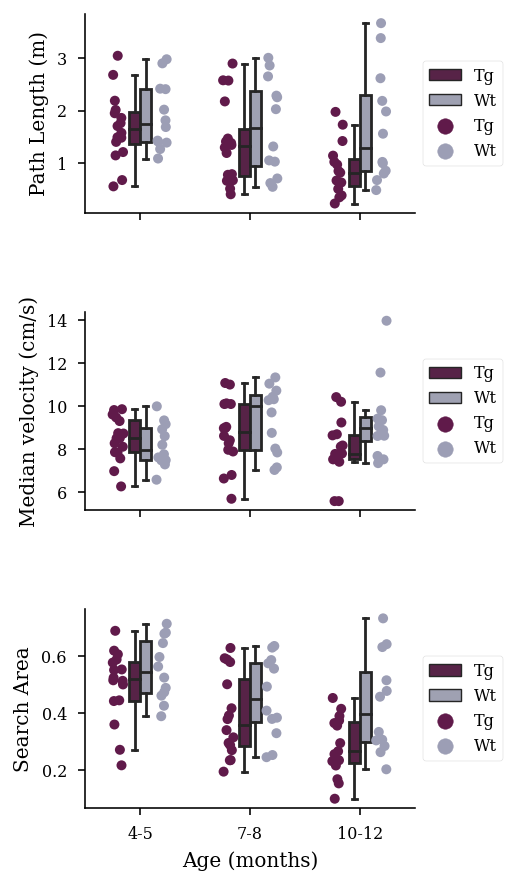

In [270]:
fig, axs = plt.subplots(3,1, figsize=set_size('thesis', fraction=.5, subplots=(4, 1)))
fig.subplots_adjust(hspace = .5, wspace=1)
axs = axs.ravel()

data_plots('time_point',df_new.path_length/1000,df_new,'group',axs[0])
data_plots('time_point','median_velocity',df_new,'group',axs[1])
data_plots('time_point','search_area',df_new,'group',axs[2])

for ax in np.arange(3):
    axs[ax].spines['right'].set_visible(False)
    axs[ax].spines['top'].set_visible(False)
    axs[ax].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_ylabel("Path Length (m)")
axs[1].set_ylabel("Median velocity (cm/s)")
axs[2].set_ylabel("Search Area")
axs[2].set_xticklabels(['4-5','7-8','10-12'])
axs[2].set_xlabel("Age (months)")
axs[2].spines['right'].set_visible(False)
axs[2].spines['top'].set_visible(False)
axs[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axs[0].set_xticklabels(['','',''])
axs[1].set_xticklabels(['','',''])
axs[0].set_xlabel("")
axs[1].set_xlabel("")

plt.savefig(fig_save_path+'small_of_distance.svg',dpi=300,bbox_inches='tight')


### Example paths color coded by velocity

In [8]:
small_of_paths = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/small_of_paths/'
# first create dataframe for ease of identifying mice
path_list = glob.glob(small_of_paths+'*.csv')
df = pd.DataFrame(columns=['file_name','genotype','rat','time_point','day'], index=range(len(path_list)))

for idx, path in enumerate(path_list): 
    temp_name = os.path.splitext(os.path.basename(path))[0].split('_')
    df.loc[idx].file_name = os.path.basename(path)
    df.loc[idx].genotype = temp_name[0]
    df.loc[idx].rat = temp_name[1]
    df.loc[idx].time_point = temp_name[2]
    df.loc[idx].day = temp_name[3]
    
vel_cmap,vel_vec = factor_norm_cmap(df,small_of_paths,"velocity")

In [9]:
df_day1 = df_lg[df_lg['day']=='D1']

df_12mo = df[df['time_point']=='12']
df_12mo

,file_name,genotype,rat,time_point,day
4,Wt_205_12_2.csv,Wt,205,12,2
5,Wt_204_12_2.csv,Wt,204,12,2
7,Tg_110_12_3.csv,Tg,110,12,3
8,Tg_111_12_3.csv,Tg,111,12,3
11,Tg_111_12_2.csv,Tg,111,12,2
...,...,...,...,...,...
237,Tg_102_12_3.csv,Tg,102,12,3
244,Tg_109_12_1.csv,Tg,109,12,1
245,Tg_108_12_1.csv,Tg,108,12,1
246,Tg_102_12_2.csv,Tg,102,12,2


In [ ]:
save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/12mo_small_paths/'
def path_by_vel(temp_df_1,fig_save_path,save_name):
    """ plots each sample in path by velocity
    input: 
    df: dataframe with x,y,velocity with each row as frame.
    fig_save_path: place where you want figure to be saved
    """
    fig, axs = plt.subplots(1, figsize=set_size('thesis', fraction=.25, subplots=(2, 1.3)), edgecolor='w')
    axs.scatter(temp_df_1.x,temp_df_1.y,c = cm.magma_r(np.round(temp_df_1.velocity,2)/np.nanmax(vel_vec)),edgecolor='none',s = 10,alpha=.5 )
    axs.axis('off')

    plt.savefig(fig_save_path+save_name+'.svg',dpi=300,bbox_inches='tight')

    
for file in df_12mo.file_name:
    temp_df_1 = pd.read_csv(small_of_paths+file)
    path_by_vel(temp_df_1,save_path,file)

## Plot median occupany collapsed across day/timepoint

In [178]:
# load small open field paths 
wt_paths = pd.DataFrame()
tg_paths = pd.DataFrame()
for idx, file in enumerate(df.file_name):
    temp = pd.read_csv(small_of_paths+file)
    if df["genotype"][idx] == 'Wt':
        wt_paths = wt_paths.append(temp,ignore_index = True)
    else:
        tg_paths = tg_paths.append(temp,ignore_index = True)


<ipython-input-186-942ec2eaff0d>:28: RuntimeWarning: Mean of empty slice
  wt_occ_mean = np.nanmean(np.asarray(wt_occ),axis=0)
<ipython-input-186-942ec2eaff0d>:29: RuntimeWarning: Mean of empty slice
  tg_occ_mean = np.nanmean(np.asarray(tg_occ),axis=0)


TypeError: 'Text' object is not callable

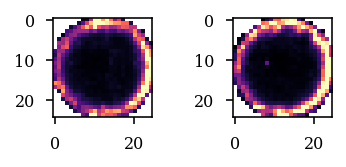

In [186]:
from scipy.ndimage import gaussian_filter

def occ_heatmap(df,x_edges,y_edges):

    occ,__,__ = np.histogram2d(df.x,df.y,bins = (x_edges,y_edges))
    
    nan_idx = occ == 0

    occ = gaussian_filter(occ/10,sigma = .5)
    
    occ[nan_idx] = np.nan
    return occ

x_edges = np.arange(np.nanmin(np.hstack([tg_paths.x,wt_paths.x])),np.nanmax(np.hstack([tg_paths.x,wt_paths.x])),3)
y_edges = np.arange(np.nanmin(np.hstack([tg_paths.y,wt_paths.y])),np.nanmax(np.hstack([tg_paths.y,wt_paths.y])),3)

# compute heatmap per subject 
wt_occ = []
tg_occ = []
for idx, file in enumerate(df.file_name):
    temp = pd.read_csv(small_of_paths+file)
    if df["genotype"][idx] == 'Wt':
        wt_occ.append(occ_heatmap(temp,x_edges,y_edges))
    else:
        tg_occ.append(occ_heatmap(temp,x_edges,y_edges))

# compute median heatmap per group 
wt_occ_mean = np.nanmean(np.asarray(wt_occ),axis=0)
tg_occ_mean = np.nanmean(np.asarray(tg_occ),axis=0)



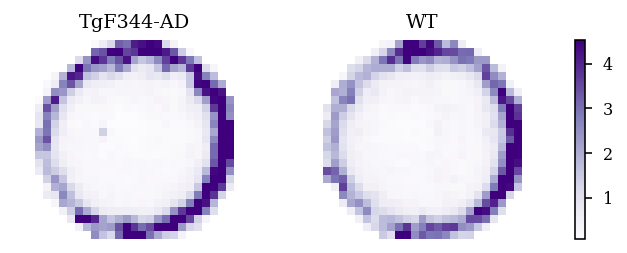

In [279]:
fig,ax = plt.subplots(1,2,figsize=set_size('thesis', fraction=1, subplots=(1, 2)))
ax = ax.ravel()

p1 = ax[1].imshow(wt_occ_mean,vmax = np.nanmax([wt_occ_mean,tg_occ_mean])*.5,vmin = np.nanmin([wt_occ_mean,tg_occ_mean]),cmap=plt.get_cmap('Purples'))
ax[0].imshow(tg_occ_mean,vmax = np.nanmax([wt_occ_mean,tg_occ_mean])*.5,vmin = np.nanmin([wt_occ_mean,tg_occ_mean]),cmap=plt.get_cmap('Purples'))
ax[1].set_title('WT')
ax[0].set_title('TgF344-AD')
ax[0].axis('equal')
ax[1].axis('equal')
ax[0].axis('off')
ax[1].axis('off')
fig.colorbar(p1,ax=ax)

plt.savefig(fig_save_path+'small_open_field_occupancy_groups.svg',dpi=300,bbox_inches='tight')


In [150]:
np.hstack([tg_paths.x,wt_paths.x])

array([-0.16245396, -2.47560775, -5.1174802 , ...,  8.25823986,
        6.60588755,  5.28049608])

In [172]:
wt_occ = []
tg_occ = []
for idx, file in enumerate(df.file_name):
    temp = pd.read_csv(small_of_paths+file)
    if df["genotype"][idx] == 'Wt':
        wt_occ.append(occ_heatmap(temp,x_edges,y_edges))
    else:
        tg_occ.append(occ_heatmap(temp,x_edges,y_edges))

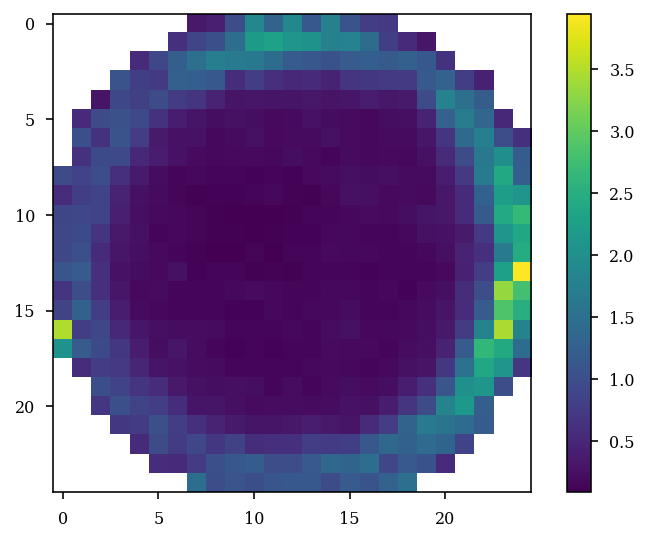

In [173]:
plt.imshow(np.nanmedian(np.asarray(wt_occ),axis=0))
plt.colorbar()

In [168]:
np.asarray(wt_occ).shape

(107, 25, 25)

### Fig 2 Running Segment Features

In [17]:
df_seg = pd.read_csv(data_path+"movement_epochs.csv")
df_day1_seg = df_seg[df_seg['day']=='D1']
df_day1_seg.head()

,subID,group,day,circuity,num_runs,run_length,proximity_cue,median_peak_vel,median_duration,median_inter_run_interval
0,Tg102_D1,tg,D1,0.474414,8,147.725887,103.985545,7.231567,13.383333,28.600000
2,Tg103_D1,tg,D1,0.130543,12,61.521274,10.157918,2.814024,10.500000,79.033333
4,Tg104_D1,tg,D1,0.444387,5,72.287602,161.700049,3.500167,14.600000,312.883333
6,Tg105_D1,tg,D1,0.052930,10,87.243854,8.467477,3.485482,16.383333,107.233333
8,Tg106_D1,tg,D1,0.512846,20,40.099846,159.078851,2.993030,7.883333,18.400000


### Figure 3 Stops

In [22]:
df_stop = pd.read_csv(data_path+"stop_epochs.csv")
df_day1_stop = df_stop[df_stop['day']=='D1']
df_day1_stop.head()

,subID,group,day,num_stop,proximity_cue,median_duration,median_inter_stop_interval
0,Tg102_D1,tg,D1,87,97.202392,8.100000,15.233333
2,Tg103_D1,tg,D1,99,8.416834,4.900000,11.816667
4,Tg104_D1,tg,D1,91,153.288765,6.366667,12.416667
6,Tg105_D1,tg,D1,73,12.287812,6.333333,11.766667
8,Tg106_D1,tg,D1,65,173.521559,7.566667,15.233333


### Figure 4 

In [72]:
# Loading data
df = pd.read_csv(data_path+"hbData.csv")
# grab day 1
df_day1 = df[df['day']=='D1']

D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


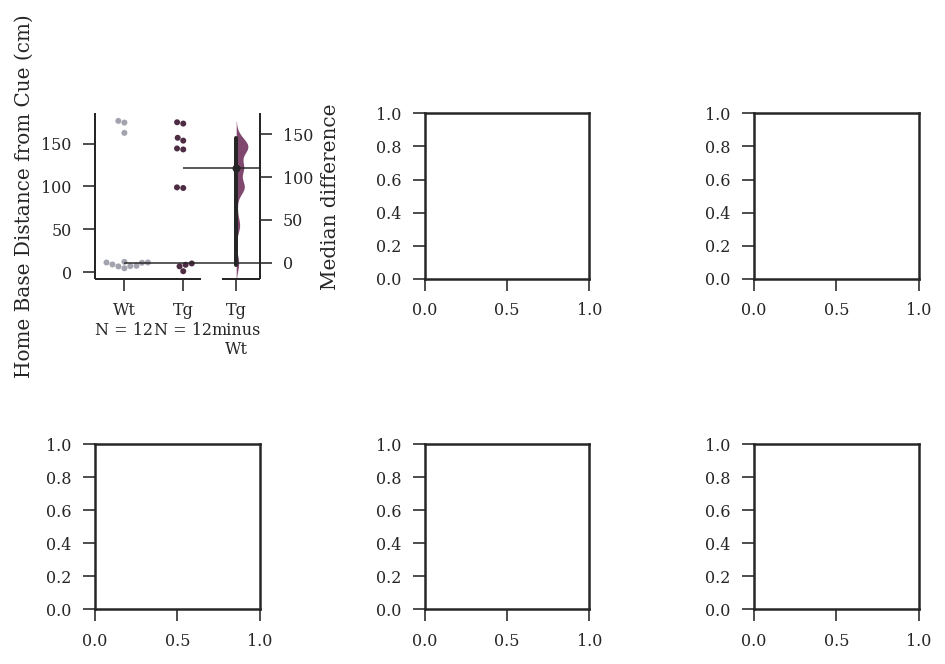

In [78]:
fig, axs = plt.subplots(2,3, figsize=set_size('thesis', fraction=1.25, subplots=(3, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

pathL_df = dabest.load(df_day1, idx=("Wt","Tg"),x="group", y="Distance2Cue")
flatui = ["#601a4a","#9c9eb5"]   
ax = pathL_df.median_diff.plot(ax=axs[0],custom_palette=flatui,raw_marker_size=3,es_marker_size=4)
axs[0].set_ylabel("Home Base Distance from Cue (cm)")

plt.savefig(fig_save_path+'Distance2Cue.svg',dpi=900,bbox_inches='tight')


### Figure 5 

D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\pandas\core\generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\ryanh\Anaconda3\envs\TgF344-AD_Open_Field\lib\site-packages\dabest\_classes.py:751: UserWarning: There are 328 bootstrap(s) that are not defined. This is likely due to smaple sample sizes. The values in a bootstrap for a group will be more likely to be all equal, with a resulting variance of zero. The computation of Cohen's d and Hedges' g thus involved a division by zero. 
  warnings.warn(warn_ms

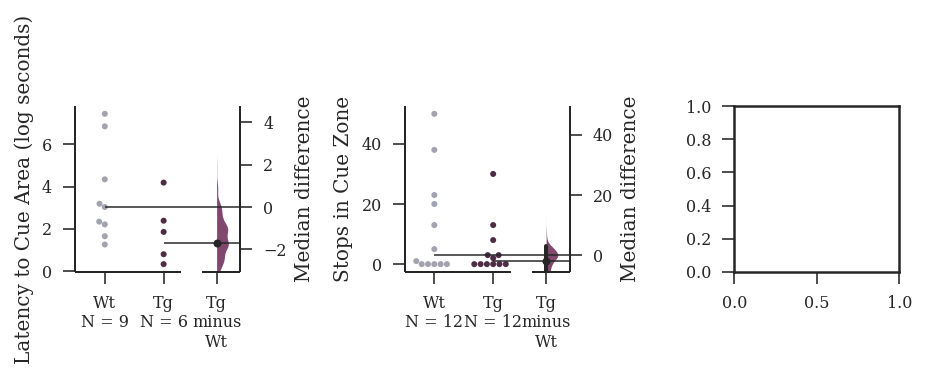

In [82]:
df = pd.read_csv(data_path+"cueData.csv")
df_day2 = df[df['day']=='D2']

fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=1.25, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()


df_day2.time2cue = np.log(df_day2.time2cue)

df = pd.read_csv(data_path+"wholeTrial_measures.csv")
df_day2 = df[df['day']=='D2']

plt.savefig(fig_save_path+'cue_time_stops.svg',dpi=900,bbox_inches='tight')


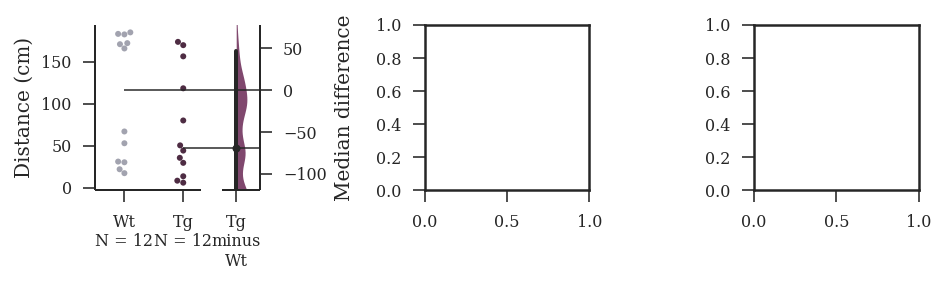

In [83]:
df = pd.read_csv(data_path+"HBdist.csv")

fig, axs = plt.subplots(1,3, figsize=set_size('thesis', fraction=1.25, subplots=(1, 3)), edgecolor='k')
fig.subplots_adjust(hspace = 1, wspace=1)
axs = axs.ravel()

plt.savefig(fig_save_path+'primaryHBdist.svg',dpi=900,bbox_inches='tight')
